# Breast Cancer

## This notebook contains 3 sections:

1. DATA VISUALIZATION

2. DIMENSIONALITY REDUCTION

3. MODEL TRAINING WITH DEEP LEARNING (Keras framework)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pydot
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda
from keras.utils import plot_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
columns=data.columns
print(columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.drop({'id','Unnamed: 32'}, axis=1, inplace = True)

In [7]:
columns=data.columns
print(columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [10]:
data.describe(include=['object'])

,diagnosis
count,569
unique,2
top,B
freq,357


In [11]:
data.groupby('diagnosis').agg(['min','max','mean'])

radius_mean                   texture_mean                    \
                  min    max       mean          min    max       mean   
diagnosis                                                                
B               6.981  17.85  12.146524         9.71  33.81  17.914762   
M              10.950  28.11  17.462830        10.38  39.28  21.604906   

          perimeter_mean                    area_mean    ...     \
                     min    max        mean       min    ...      
diagnosis                                                ...      
B                  43.79  114.6   78.075406     143.5    ...      
M                  71.90  188.5  115.365377     361.6    ...      

          concavity_worst concave points_worst                   \
                     mean                  min    max      mean   
diagnosis                                                         
B                0.166238              0.00000  0.175  0.074444   
M                0.450606              0.02899  0.291  0.182237   

          symmetry_worst                   fractal_dimension_worst          \
                     min     max      mean                     min     max   
diagnosis                                                                    
B                 0.1566  0.4228  0.270246                 0.05521  0.1486   
M                 0.1565  0.6638  0.323468                 0.05504  0.2075   

                     
               mean  
diagnosis            
B          0.079442  
M          0.091530  

[2 rows x 90 columns]

In [12]:
d = {'M' : 1, 'B' : 0}
data['diagnosis'] = data['diagnosis'].map(d)

In [13]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [14]:
features_mean=list(data.columns[1:31])
dataM=data[data['diagnosis'] ==1]
dataB=data[data['diagnosis'] ==0]

## Feature histograms

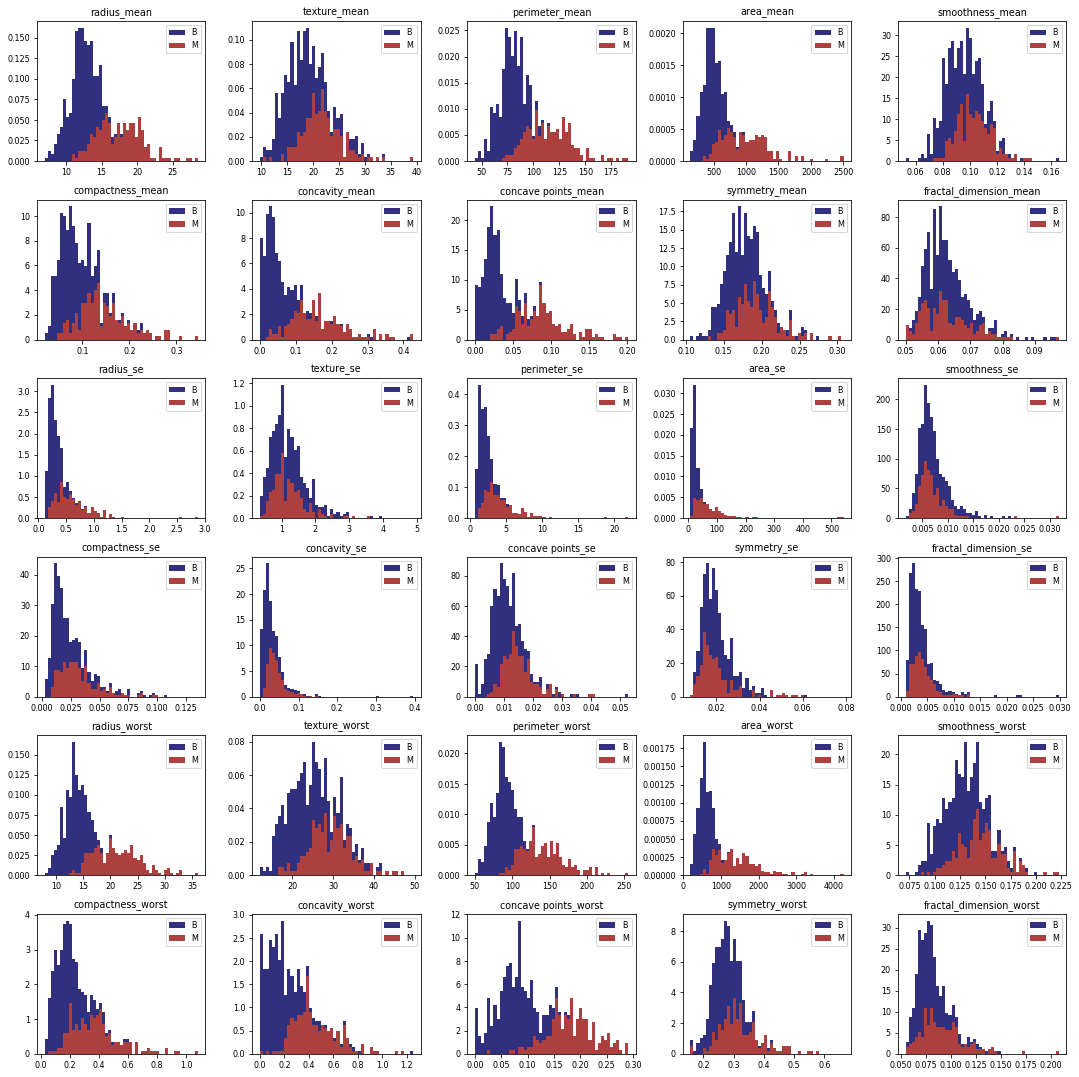

In [15]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,15))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dataM[features_mean[idx]],dataB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.9,stacked=True, density = True, label=['M','B'],color=['brown','midnightblue'], histtype= 'stepfilled')
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

## Correlation Map

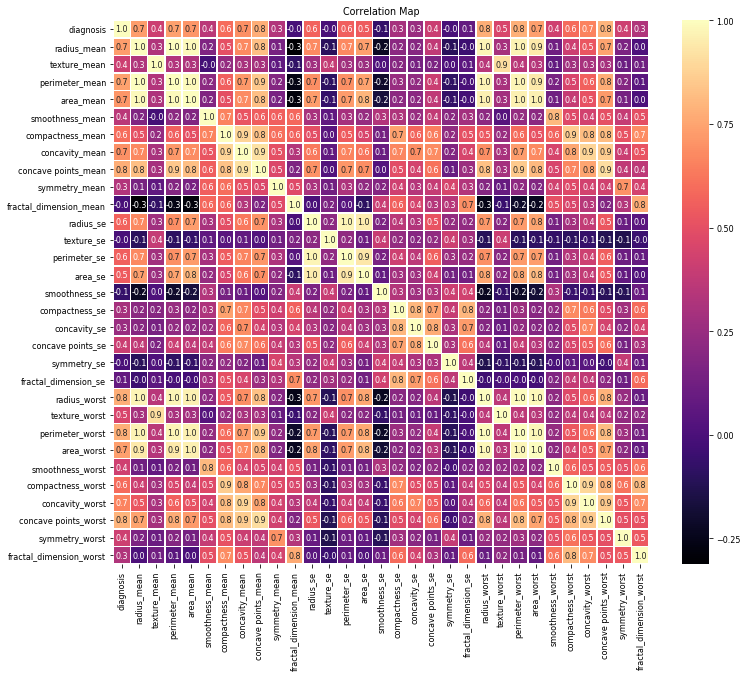

In [16]:
f,ax=plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(),cmap="magma",annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [17]:
target = data['diagnosis']
fea_data = data.drop('diagnosis', axis=1)

In [18]:
fea_data.shape

(569, 30)

In [19]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


## Dimensionality reduction

In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [21]:
X = fea_data.values
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)
tsne = TSNE(n_components=2,verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.021114
[t-SNE] Error after 2000 iterations: 0.209300


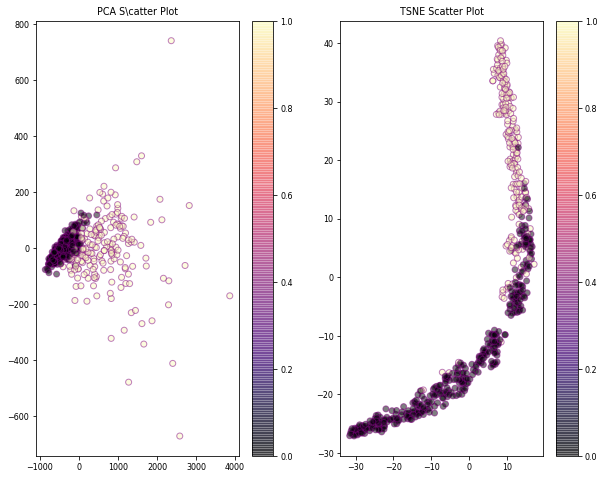

In [30]:
plt.figure(figsize = (10,8))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, cmap = "magma", edgecolor = "purple", alpha=0.5)
plt.colorbar()
plt.title('PCA S\catter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, cmap = "magma", edgecolor = "purple", alpha=0.5)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [23]:
pca = PCA(n_components=2)
pca_2d_std = pca.fit_transform(X_std)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results_std = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.795647
[t-SNE] Error after 2000 iterations: 0.856485


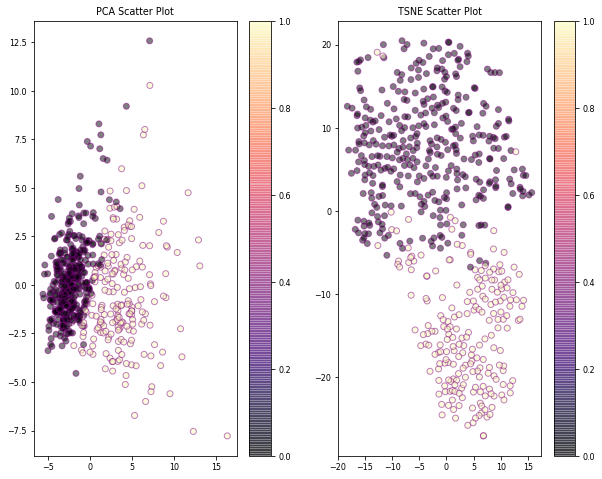

In [24]:
plt.figure(figsize = (10,8))
plt.subplot(121)
plt.scatter(pca_2d_std[:,0],pca_2d_std[:,1], c = target, cmap = "magma", edgecolor = "purple", alpha=0.5)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results_std[:,0],tsne_results_std[:,1], c = target, cmap = "magma", edgecolor = "purple", alpha=0.5)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

# Deep Learning KERAS

In [25]:
X = fea_data.values
y = target.values
labelencoder_X = LabelEncoder()
y = labelencoder_X.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [26]:
classifier = Sequential()
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=400, nb_epoch=400)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/400
512/512 [==============================] - 0s 904us/step - loss: 0.6964 - acc: 0.6289
Epoch 2/400
512/512 [==============================] - 0s 17us/step - loss: 0.6897 - acc: 0.3711
Epoch 3/400
512/512 [==============================] - 0s 14us/step - loss: 0.6841 - acc: 0.3711
Epoch 4/400
512/512 [==============================] - 0s 19us/step - loss: 0.6797 - acc: 0.3711
Epoch 5/400
512/512 [==============================] - 0s 14us/step - loss: 0.6766 - acc: 0.3711
Epoch 6/400
512/512 [==============================] - 0s 15us/step - loss: 0.6741 - acc: 0.3711
Epoch 7/400
512/512 [==============================] - 0s 15us/step - loss: 0.6724 - acc: 0.3711
Epoch 8/400
512/512 [==============================] - 0s 18us/step - loss: 0.6702 - acc: 0.3711
Epoch 9/400
512/512 [==============================] - 0s 19us/step - loss: 0.6674 - acc: 0.3711
Epoch 10/400
512/512 [==============================] - 0s 12us/step - loss: 0.6638 - acc: 0.3711
Epoch 11/400
512/512 [======

512/512 [==============================] - 0s 11us/step - loss: 0.2050 - acc: 0.9199
Epoch 85/400
512/512 [==============================] - 0s 11us/step - loss: 0.2129 - acc: 0.9102
Epoch 86/400
512/512 [==============================] - 0s 12us/step - loss: 0.2114 - acc: 0.9102
Epoch 87/400
512/512 [==============================] - 0s 15us/step - loss: 0.2033 - acc: 0.9160
Epoch 88/400
512/512 [==============================] - 0s 9us/step - loss: 0.2067 - acc: 0.9141
Epoch 89/400
512/512 [==============================] - 0s 10us/step - loss: 0.2036 - acc: 0.9160
Epoch 90/400
512/512 [==============================] - 0s 16us/step - loss: 0.2043 - acc: 0.9180
Epoch 91/400
512/512 [==============================] - 0s 21us/step - loss: 0.2023 - acc: 0.9160
Epoch 92/400
512/512 [==============================] - 0s 17us/step - loss: 0.2042 - acc: 0.9141
Epoch 93/400
512/512 [==============================] - 0s 18us/step - loss: 0.2039 - acc: 0.9141
Epoch 94/400
512/512 [============

512/512 [==============================] - 0s 15us/step - loss: 0.1791 - acc: 0.9238
Epoch 168/400
512/512 [==============================] - 0s 17us/step - loss: 0.1819 - acc: 0.9258
Epoch 169/400
512/512 [==============================] - 0s 17us/step - loss: 0.1808 - acc: 0.9258
Epoch 170/400
512/512 [==============================] - 0s 15us/step - loss: 0.1799 - acc: 0.9219
Epoch 171/400
512/512 [==============================] - 0s 18us/step - loss: 0.1783 - acc: 0.9258
Epoch 172/400
512/512 [==============================] - 0s 13us/step - loss: 0.1796 - acc: 0.9219
Epoch 173/400
512/512 [==============================] - 0s 20us/step - loss: 0.1800 - acc: 0.9238
Epoch 174/400
512/512 [==============================] - 0s 18us/step - loss: 0.1780 - acc: 0.9238
Epoch 175/400
512/512 [==============================] - 0s 16us/step - loss: 0.1846 - acc: 0.9277
Epoch 176/400
512/512 [==============================] - 0s 12us/step - loss: 0.1790 - acc: 0.9258
Epoch 177/400
512/512 [=

512/512 [==============================] - 0s 16us/step - loss: 0.1712 - acc: 0.9316
Epoch 250/400
512/512 [==============================] - 0s 16us/step - loss: 0.1660 - acc: 0.9297
Epoch 251/400
512/512 [==============================] - 0s 20us/step - loss: 0.1723 - acc: 0.9297
Epoch 252/400
512/512 [==============================] - 0s 18us/step - loss: 0.1626 - acc: 0.9316
Epoch 253/400
512/512 [==============================] - 0s 14us/step - loss: 0.1680 - acc: 0.9297
Epoch 254/400
512/512 [==============================] - 0s 18us/step - loss: 0.1660 - acc: 0.9336
Epoch 255/400
512/512 [==============================] - 0s 19us/step - loss: 0.1656 - acc: 0.9297
Epoch 256/400
512/512 [==============================] - 0s 16us/step - loss: 0.1751 - acc: 0.9277
Epoch 257/400
512/512 [==============================] - 0s 17us/step - loss: 0.1671 - acc: 0.9297
Epoch 258/400
512/512 [==============================] - 0s 10us/step - loss: 0.1641 - acc: 0.9316
Epoch 259/400
512/512 [=

512/512 [==============================] - 0s 13us/step - loss: 0.1611 - acc: 0.9375
Epoch 332/400
512/512 [==============================] - 0s 12us/step - loss: 0.1500 - acc: 0.9355
Epoch 333/400
512/512 [==============================] - 0s 14us/step - loss: 0.1691 - acc: 0.9258
Epoch 334/400
512/512 [==============================] - 0s 14us/step - loss: 0.1625 - acc: 0.9297
Epoch 335/400
512/512 [==============================] - 0s 17us/step - loss: 0.1640 - acc: 0.9336
Epoch 336/400
512/512 [==============================] - 0s 16us/step - loss: 0.1601 - acc: 0.9395
Epoch 337/400
512/512 [==============================] - 0s 22us/step - loss: 0.1539 - acc: 0.9375
Epoch 338/400
512/512 [==============================] - 0s 17us/step - loss: 0.1588 - acc: 0.9316
Epoch 339/400
512/512 [==============================] - 0s 22us/step - loss: 0.1515 - acc: 0.9355
Epoch 340/400
512/512 [==============================] - 0s 14us/step - loss: 0.1582 - acc: 0.9375
Epoch 341/400
512/512 [=